In [116]:
import pandas as pd

In [117]:
import numpy as np

In [118]:
data = pd.read_csv("Social_Network_Ads.csv")

In [119]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [121]:
from sklearn.preprocessing import LabelEncoder
lb  = LabelEncoder()

In [122]:
data['Gender'] = lb.fit_transform(data['Gender'])

In [123]:
data['Gender'].unique()

array([1, 0], dtype=int64)

In [155]:
X = data.drop(["Purchased","User ID"],axis=1)
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [158]:
y = data["Purchased"]

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
sc = StandardScaler()

In [161]:
X = sc.fit_transform(X)

In [162]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
dc = DecisionTreeClassifier(max_depth=8)

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [167]:
x_train.shape

(320, 3)

In [168]:
x_test.shape

(80, 3)

In [169]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [170]:
from sklearn.tree import plot_tree

In [171]:
from matplotlib.pylab import rcParams

In [172]:
rcParams["figure.figsize"] = 20,20

[Text(525.0101351351351, 1026.8, 'X[1] <= 0.463\ngini = 0.459\nsamples = 320\nvalue = [206, 114]'),
 Text(226.2162162162162, 906.0, 'X[2] <= 0.58\ngini = 0.257\nsamples = 224\nvalue = [190, 34]'),
 Text(90.48648648648648, 785.2, 'X[2] <= 0.081\ngini = 0.042\nsamples = 188\nvalue = [184, 4]'),
 Text(60.32432432432432, 664.4, 'gini = 0.0\nsamples = 131\nvalue = [131, 0]'),
 Text(120.64864864864865, 664.4, 'X[1] <= -0.11\ngini = 0.131\nsamples = 57\nvalue = [53, 4]'),
 Text(90.48648648648648, 543.6, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(150.8108108108108, 543.6, 'X[2] <= 0.404\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(120.64864864864865, 422.79999999999995, 'X[2] <= 0.257\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(90.48648648648648, 302.0, 'X[1] <= 0.319\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(60.32432432432432, 181.19999999999993, 'X[0] <= 0.02\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(30.16216216216216, 60.399999999999864, 'gini

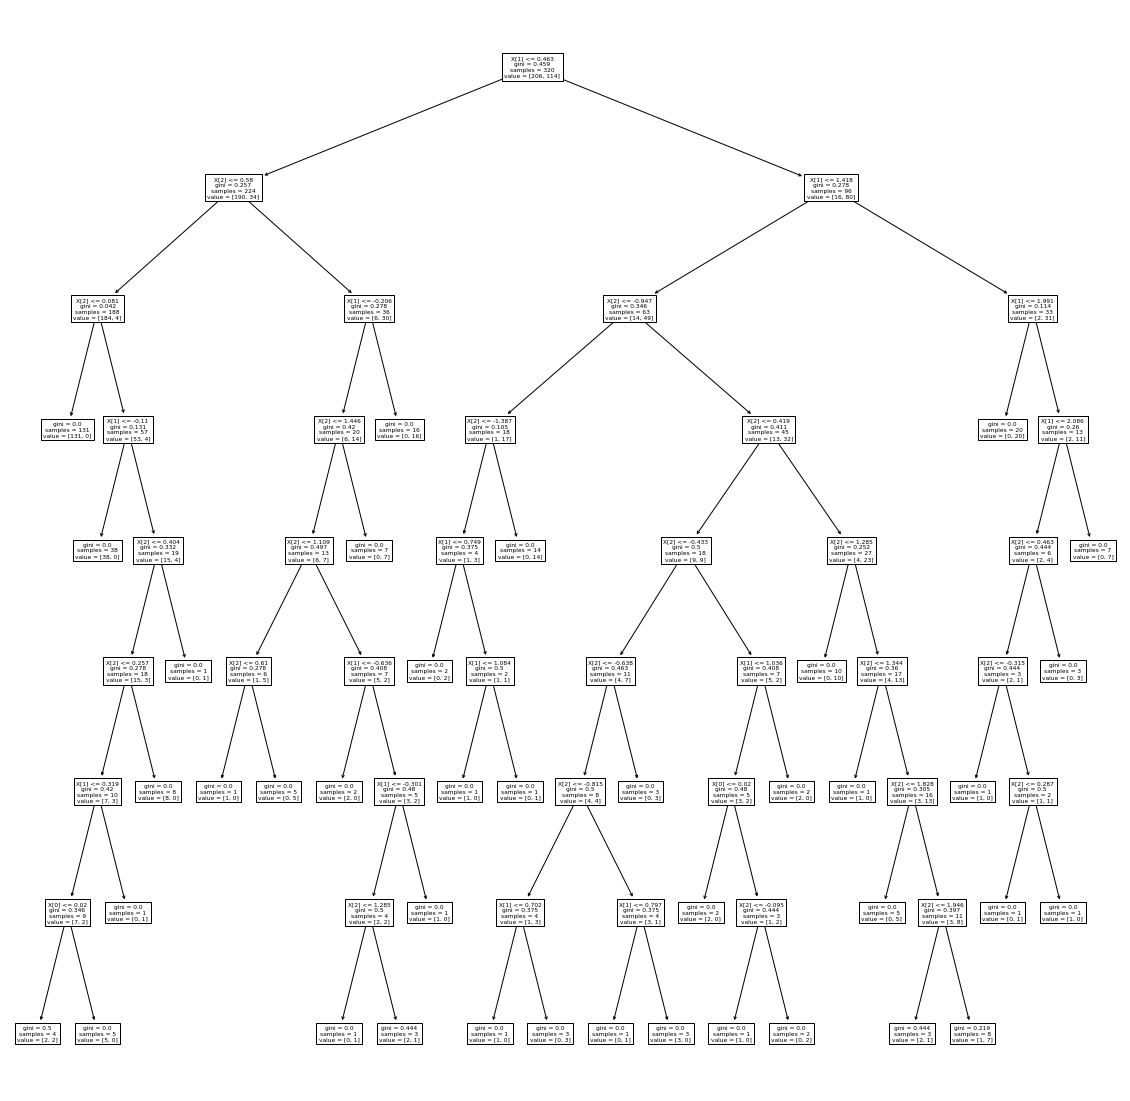

In [173]:
plot_tree(dc)

In [174]:
YPred= dc.predict(x_test)

In [175]:
YPred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [176]:
from sklearn.metrics import accuracy_score

In [177]:
accuracy_score(y_test, YPred)

0.85

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,random_state=0)
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rf.fit(x_train,y_train)
yPred = rf.predict(x_test)
print("accuracy_score :",(accuracy_score(y_test,yPred)*100))
print("confusion_matrix : \n",(confusion_matrix(y_test,yPred)))
print("classification_report :\n",(classification_report(y_test,yPred)))

accuracy_score : 88.75
confusion_matrix : 
 [[47  4]
 [ 5 24]]
classification_report :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.86      0.83      0.84        29

    accuracy                           0.89        80
   macro avg       0.88      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



In [179]:
print("{:.2f}".format((45+22)/80))

0.84


In [180]:
print("{:.2f}".format(45/(45+9)))

0.83


In [181]:
print("{:.2f}".format(((45/(45+9))+(4/(4+22)))/2))

0.49


In [182]:
print("{:.2f}".format(((45/(45+4))+(9/(9+22)))/2))

0.60


In [184]:
features = ["Gender","Age","EstimatedSalary"]
for features, imp in zip(features, rf.feature_importances_):
    print(features, imp)

Gender 0.011284038642463573
Age 0.516746809542467
EstimatedSalary 0.47196915181506954
